# Ordinal Variable Analysis
This notebook will showcase ordinal variable analysis using Python. The module used will be scipy.stats, so make sure you have downloaded it. This is not intended to be a statistical tutorial or showcase entirely the scipy.stats module. The dataset used is an [Employee Satisfaction Survey](www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis) from [Kaggle](https://www.kaggle.com/). The description of the dataset from the creator is as follows:

*The Employee Satisfaction Survey dataset is a comprehensive collection of information regarding employees within a company. It includes essential details such as employee identification numbers, self-reported satisfaction levels, performance evaluations, project involvement, work hours, tenure with the company, work accidents, promotions received in the last 5 years, departmental affiliations, and salary levels. This dataset offers valuable insights into the factors influencing employee satisfaction and can be used to analyze and understand various aspects of the workplace environment.*

Our goal in this notebook is to transform some of the columns to Ordinal Categorical data in order to use statistics, and see if there are relationships between the rankings of variables. Our null hypothesis for every pair of variables is that they are independent, which means that one's distribution does not affect the other one. Our goal will be to find if there are any dependent variables, test if they are statistically significant (we'll be using p-value=0.05), the magnitude and the intensity of the relationship. We'll be using both [Spearman's Rho](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) and [Kendall's Tau Coefficient](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient).

---

> Kostas Riganas <br />
> IT & Data Lead <br />
> UniAI <br />
> kriganas@uniai.gr


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

We specified the data types for each column in the dataset. It is not necessary, but it is good to specify them. You can check pandas basic data types [here](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes).

In [2]:
data = pd.read_csv('data/Employee Attrition.csv', 
                   dtype={
                       'Emp ID': 'string',
                       'number_project': 'Int64',
                       'average_montly_hours': 'Int64',
                       'time_spend_company': 'Int64',
                       'Work_accident': 'boolean',
                       'promotion_last_5years': 'boolean',
                       'dept': 'string',
                       'salary': 'string'
                   }
)

In [3]:
data

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,False,False,sales,low
1,2,0.80,0.86,5,262,6,False,False,sales,medium
2,3,0.11,0.88,7,272,4,False,False,sales,medium
3,4,0.72,0.87,5,223,5,False,False,sales,low
4,5,0.37,0.52,2,159,3,False,False,sales,low
...,...,...,...,...,...,...,...,...,...,...
15782,14995,0.40,0.57,2,151,3,False,False,support,low
15783,14996,0.37,0.48,2,160,3,False,False,support,low
15784,14997,0.37,0.53,2,143,3,False,False,support,low
15785,14998,0.11,0.96,6,280,4,False,False,support,low


In [4]:
data.dtypes

Emp ID                   string[python]
satisfaction_level              float64
last_evaluation                 float64
number_project                    Int64
average_montly_hours              Int64
time_spend_company                Int64
Work_accident                   boolean
promotion_last_5years           boolean
dept                     string[python]
salary                   string[python]
dtype: object

In [5]:
data.isna().sum()

Emp ID                   788
satisfaction_level       788
last_evaluation          788
number_project           788
average_montly_hours     788
time_spend_company       788
Work_accident            788
promotion_last_5years    788
dept                     788
salary                   788
dtype: int64

We see that there are null values, and to be exact, for 788 employees. Let's remove them before proceeding.

In [6]:
data.dropna(subset='Emp ID', inplace=True)

## Variable Distributions
We might have not done a matplotlib lesson yet, but we can use some functions to get a better idea of our data.

`edgecolor`: we give a color that the edges of a bar will have. If we don't give a color it will not show borders between bars.

`linewidth`: the width (in pixels) of the borders between the bars.

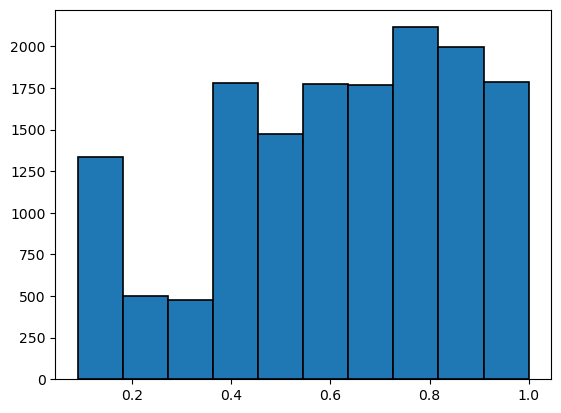

In [7]:
_ = plt.hist(data.loc[:, 'satisfaction_level'], edgecolor='black', linewidth=1.2)

We can see there are many unsatisfied employees (< 0.2), many moderately satisfied (0.4 < sat < 0.6) and many that are satisfied (0.6 >).

(0.0, 1.0)

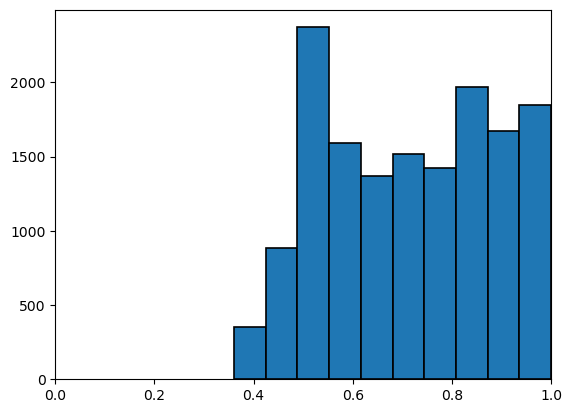

In [8]:
_ = plt.hist(data.loc[:, 'last_evaluation'], edgecolor='black', linewidth=1.2)
plt.xlim([0, 1])

In [9]:
data.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.0,14999.0,14999.0
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.0,96.0,2.0
25%,0.440000,0.560000,3.0,156.0,3.0
50%,0.640000,0.720000,4.0,200.0,3.0
75%,0.820000,0.870000,5.0,245.0,4.0
max,1.000000,1.000000,7.0,310.0,10.0


In [10]:
data.loc[:, ['Work_accident', 'promotion_last_5years']].describe()

,Work_accident,promotion_last_5years
count,14999,14999
unique,2,2
top,False,False
freq,12830,14680


In [11]:
data.loc[:, ['dept', 'salary']].describe()

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


## Transforming to Ordinal

In [12]:
data.loc[:, 'salary'].unique()

<StringArray>
['low', 'medium', 'high']
Length: 3, dtype: string

Salary already has "ordinal" values, so we can make them immediately Ordinal Categorical. Since the array above is in the order we want we can pass it as a parameter to `pd.Categorical`.

In [13]:
data.loc[:, 'salary'] = pd.Categorical(data.loc[:, 'salary'],
               categories=data.loc[:, 'salary'].unique(),
               ordered=True)

For our numerical values, we can use the `pd.cut` function pandas provides, assisting us on creating categories from the arithmetic values.

In [14]:
(data.loc[:, 'average_montly_hours'] / 8).describe()

count      14999.0
mean     25.131292
std       6.242887
min           12.0
25%           19.5
50%           25.0
75%         30.625
max          38.75
Name: average_montly_hours, dtype: Float64

In [15]:
bins = [0, 15 * 8, 20 * 8, 25 * 8, 30 * 8, np.inf]
labels = ['< 15 days', '15-20 days', '20-25 days', '25-30 days', '> 30+ days']
data.loc[:, 'average_monthly_work_days'] = pd.cut(data.loc[:, 'average_montly_hours'],
       bins=bins,
       labels=labels
)

In [16]:
bins = [0, 3, 5, np.inf]
labels = ['2-3', '4-5', '6+']
data.loc[:, 'projects'] = pd.cut(data.loc[:, 'number_project'],
       bins=bins,
       labels=labels
)

In [17]:
bins = [0, 3, 5, 7, np.inf]
labels = ['2-3', '4-5', '6-7', '8+']
data.loc[:, 'years_in_company'] = pd.cut(data.loc[:, 'time_spend_company'],
       bins=bins,
       labels=labels
)

In [18]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Very Bad', 'Bad', 'Moderate', 'Good', 'Very Good']
data.loc[:, 'evaluation'] = pd.cut(data.loc[:, 'last_evaluation'],
       bins=bins,
       labels=labels
)

In [19]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
data.loc[:, 'satisfaction'] = pd.cut(data.loc[:, 'satisfaction_level'],
       bins=bins,
       labels=labels
)

In [20]:
data

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,average_monthly_work_days,projects,years_in_company,evaluation,satisfaction
0,1,0.38,0.53,2,157,3,False,False,sales,low,15-20 days,2-3,2-3,Moderate,Low
1,2,0.80,0.86,5,262,6,False,False,sales,medium,> 30+ days,4-5,6-7,Very Good,High
2,3,0.11,0.88,7,272,4,False,False,sales,medium,> 30+ days,6+,4-5,Very Good,Very Low
3,4,0.72,0.87,5,223,5,False,False,sales,low,25-30 days,4-5,4-5,Very Good,High
4,5,0.37,0.52,2,159,3,False,False,sales,low,15-20 days,2-3,2-3,Moderate,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15782,14995,0.40,0.57,2,151,3,False,False,support,low,15-20 days,2-3,2-3,Moderate,Low
15783,14996,0.37,0.48,2,160,3,False,False,support,low,15-20 days,2-3,2-3,Moderate,Low
15784,14997,0.37,0.53,2,143,3,False,False,support,low,15-20 days,2-3,2-3,Moderate,Low
15785,14998,0.11,0.96,6,280,4,False,False,support,low,> 30+ days,6+,4-5,Very Good,Very Low


In [21]:
clean_df = data.drop(columns=['satisfaction_level', 'last_evaluation','number_project', 'average_montly_hours', 'time_spend_company'])

In [22]:
clean_df.set_index('Emp ID', inplace=True)

In [23]:
clean_df

,Work_accident,promotion_last_5years,dept,salary,average_monthly_work_days,projects,years_in_company,evaluation,satisfaction
Emp ID,,,,,,,,,
1,False,False,sales,low,15-20 days,2-3,2-3,Moderate,Low
2,False,False,sales,medium,> 30+ days,4-5,6-7,Very Good,High
3,False,False,sales,medium,> 30+ days,6+,4-5,Very Good,Very Low
4,False,False,sales,low,25-30 days,4-5,4-5,Very Good,High
5,False,False,sales,low,15-20 days,2-3,2-3,Moderate,Low
...,...,...,...,...,...,...,...,...,...
14995,False,False,support,low,15-20 days,2-3,2-3,Moderate,Low
14996,False,False,support,low,15-20 days,2-3,2-3,Moderate,Low
14997,False,False,support,low,15-20 days,2-3,2-3,Moderate,Low


## Using Kendall's Tau
Now that we have cleaned our data and have prepared the ordinal variables, let's move on to checking the relationships between the variables. Before we streamline the process, we will get into a few examples, and build it up from there. Let's test if salary and satisfaction are related in some way.

$h_0: r=0$

$h_1: r\neq0$

If r=0, then both distributions are independent, therefore there is no linear relationship between the 2.

To use Kendall's Tau, we will be using the `kendalltau` method from stats. Now a few things to notice. We will not go deep into theory, one important thing is that salary has 3 unique values, while satisfaction has 5. To correctly use Kendall Tau, we are going to specify the variant parameter to c. In other cases, where the 2 variables have equal amount of unique values, we'll be using the Kendall Tau b variant.

In [24]:
salary = clean_df.loc[:, 'salary']
satisfaction = clean_df.loc[:, 'satisfaction']

res = stats.kendalltau(salary, satisfaction, variant='c')

We have a SignificanceResult object in our hands, which allows us access to the correlation score and the pvalue of the test.

In [25]:
print(f'correlation: {res.correlation}, p-value: {res.pvalue}')

correlation: 0.0014079210498825576, p-value: 0.8429319347438202


Since p-value (0.84) > 0.05, the correlation is not statistically significant, therefore $h_0$ is true, meaning that these variables are independent.

For the next one, let's test average monthly work days with satisfaction, again apply the same hypotheses. This time both variables have 5 unique values, so we'll be using the b variant.

In [26]:
work_days = clean_df.loc[:, 'average_monthly_work_days']

res = stats.kendalltau(work_days, satisfaction, variant='b')

In [27]:
print(f'correlation: {res.correlation}, p-value: {res.pvalue}')

correlation: 0.13956022368790735, p-value: 3.558699052516668e-96


In this case, we can see that there is a correlation of 0.139, a weak positive correlation, and the p-value is way lower than 0.05, which means that the result is statistically significant and $h_0$ is false, and we accept $h_1$ with r=0.139. To interpret this, we can say that employees who work for more days (8 hours per day) per month, tend to have slightly more satisfaction.

How can we improve this process? We surely don't want to write each time the same lines of code. In this case, let's define a function to make things easier.

In [28]:
def calculate_kendall_tau(x, y):
    len_x = len(x.unique())
    len_y = len(y.unique())
    variant = 'b' if len_x == len_y else 'c'
    return stats.kendalltau(x, y, variant=variant)

In [29]:
def kendall_tau(var1, var2, dataset):
    x = dataset.loc[:, var1]
    y = dataset.loc[:, var2]
    res = calculate_kendall_tau(x, y)
    print(f'correlation: {res.correlation}, p-value: {res.pvalue}')

In [30]:
kendall_tau('average_monthly_work_days', 'satisfaction', clean_df)

correlation: 0.13956022368790735, p-value: 3.558699052516668e-96


To make this more efficient, let's create a list with all of our ordinal variables and create a loop.

In [31]:
ordinal_variables = ['salary', 'average_monthly_work_days', 'projects', 'years_in_company', 'evaluation', 'satisfaction']

In [32]:
print(' Variable Correlation '.center(50, '*'))
for pos1, var1 in enumerate(ordinal_variables):
    for pos2, var2 in enumerate(ordinal_variables):
        if pos1 < pos2:  # match each variable only once with one another
            x = clean_df.loc[:, var1]
            y = clean_df.loc[:, var2]
            res = calculate_kendall_tau(x, y)
            print(f'{var1} --- {var2}')
            print(f'correlation: {res.correlation} -- p-value: {res.pvalue}')
            print()

************** Variable Correlation **************
salary --- average_monthly_work_days
correlation: 0.001236604875153999 -- p-value: 0.8616972422581863

salary --- projects
correlation: 0.0023003372953817112 -- p-value: 0.763478522501347

salary --- years_in_company
correlation: 0.009268942484469297 -- p-value: 0.13326123676807472

salary --- evaluation
correlation: 0.006367195597781057 -- p-value: 0.3571245279954359

salary --- satisfaction
correlation: 0.0014079210498825576 -- p-value: 0.8429319347438202

average_monthly_work_days --- projects
correlation: 0.2997098533150649 -- p-value: 0.0

average_monthly_work_days --- years_in_company
correlation: 0.19532346448271562 -- p-value: 1.1259900167751982e-237

average_monthly_work_days --- evaluation
correlation: 0.11316520374643195 -- p-value: 4.934061109442667e-65

average_monthly_work_days --- satisfaction
correlation: 0.13956022368790735 -- p-value: 3.558699052516668e-96

projects --- years_in_company
correlation: 0.2370368571941287

Now we have really made our lives easier. Instead of doing analysis one by one, we used a loop to quickly conduct some tests. But still we can make it better in terms of control and depth of analysis. Let's create a Class to encapsulate all the important information.

In [33]:
class AnalyticalObject:
    def __init__(self, x_values, x_name, y_values, y_name):
        self.__data = pd.DataFrame({'__serial_number': np.arange(len(x_values)), x_name: x_values, y_name: y_values})
        self.__x_name = x_name
        self.__y_name = y_name
        self.corr = np.nan
        self.p_value = np.nan
        
    def __getitem__(self, key):
        return self.__data.loc[:, key]
    
    def kendall_tau(self):
        res = calculate_kendall_tau(self[self.__x_name], self[self.__y_name])
        self.corr = res.correlation
        self.p_value = res.pvalue
        
    def __str__(self):
        return f'AnalyticalObject({self.__x_name}, {self.__y_name}, corr: {self.corr}, p-value: {self.p_value})'
    
    def __repr__(self):
        return str(self)
    
    @property
    def table(self):
        return self.__data.pivot_table(values='__serial_number', index=self.__x_name, columns=self.__y_name, aggfunc='count')

That's a lot to handle at once. Let's break it down:
* We create a Class named AnalyticalObject
* The constructor (`__init__` method) accepts four parameters, the values of x (rows), the name of x, the values of y (columns), and the name of y
* Inside the constructor, a DataFrame is created and stored into a private variable called `__data`. The DataFrame has 3 columns: a private serial number (to create the frequency tables), the values of x and the values of y. We also initialize correlation and p-value to np.nan.
* We define the `__getitem__` method to allow us access our values using the column name and without accessing the private DataFrame.
* We then define the Kendall Tau method, to test the independence of the variables, calculating the correlation and the p-value.
* The next two methods are for the string conversion and the representation of each AnalyticalObject.
* The last method is actually transformed into an attribute using the @property decorator, so we can access it without calling it as a method

In [34]:
test = AnalyticalObject(clean_df.loc[:, 'average_monthly_work_days'], 'days_per_month', clean_df.loc[:, 'satisfaction'], 'satisfaction')

In [35]:
test.table

satisfaction,Very Low,Low,Moderate,High,Very High
days_per_month,,,,,
< 15 days,28,99,118,94,60
15-20 days,101,958,1362,816,704
20-25 days,153,244,817,1039,931
25-30 days,158,171,662,1157,1119
> 30+ days,1038,174,646,1162,1188


In [36]:
test.kendall_tau()

In [37]:
test

AnalyticalObject(days_per_month, satisfaction, corr: 0.13956022368790735, p-value: 3.558699052516668e-96)

We can use this object to quickly gather information and analyze our variables. Let's now create a loop where we create all of these duples, and then filter out the ones that are not statistically significant.

In [38]:
duples = []
for pos1, var1 in enumerate(ordinal_variables):
    for pos2, var2 in enumerate(ordinal_variables):
        if pos1 < pos2:
            x = clean_df.loc[:, var1]
            y = clean_df.loc[:, var2]
            duples.append(AnalyticalObject(x, var1, y, var2))
            duples[-1].kendall_tau()

statistically_significant = filter(lambda x: x.p_value < 0.05, duples)
for val in statistically_significant:
    print(val)

AnalyticalObject(average_monthly_work_days, projects, corr: 0.2997098533150649, p-value: 0.0)
AnalyticalObject(average_monthly_work_days, years_in_company, corr: 0.19532346448271562, p-value: 1.1259900167751982e-237)
AnalyticalObject(average_monthly_work_days, evaluation, corr: 0.11316520374643195, p-value: 4.934061109442667e-65)
AnalyticalObject(average_monthly_work_days, satisfaction, corr: 0.13956022368790735, p-value: 3.558699052516668e-96)
AnalyticalObject(projects, years_in_company, corr: 0.23703685719412876, p-value: 0.0)
AnalyticalObject(projects, evaluation, corr: 0.12011190772053204, p-value: 6.780824008370954e-67)
AnalyticalObject(projects, satisfaction, corr: 0.2071162412449827, p-value: 7.894062326729116e-185)
AnalyticalObject(years_in_company, evaluation, corr: 0.1454958699125305, p-value: 1.0708317990444802e-85)
AnalyticalObject(years_in_company, satisfaction, corr: 0.13710462074748653, p-value: 6.6864488320589584e-118)
AnalyticalObject(evaluation, satisfaction, corr: 0.

## Using Spearman's Rho
We can follow the same procedure with Spearman's Rho. We will immediately add it to the code, and define a method to use it.

In [39]:
class AnalyticalObject:
    def __init__(self, x_values, x_name, y_values, y_name):
        self.__data = pd.DataFrame({'__serial_number': np.arange(len(x_values)), x_name: x_values, y_name: y_values})
        self.__x_name = x_name
        self.__y_name = y_name
        self.corr = np.nan
        self.p_value = np.nan
        self.__test = None  # to know if we have used Kendall's Tau or Spearman's Rho
        
    def __getitem__(self, key):
        return self.__data.loc[:, key]
    
    def kendall_tau(self):
        res = calculate_kendall_tau(self[self.__x_name], self[self.__y_name])
        self.corr = res.correlation
        self.p_value = res.pvalue
        self.__test = 'kendall_tau'
        
    def spearman_rho(self):
        res = stats.spearmanr(self[self.__x_name], self[self.__y_name])
        self.corr = res.correlation
        self.p_value = res.pvalue
        self.__test = 'spearman_rho'
        
    def __str__(self):
        return f'AnalyticalObject({self.__x_name}, {self.__y_name}, corr: {self.corr}, p-value: {self.p_value}, ranking_coefficient: {self.__test})'
    
    def __repr__(self):
        return str(self)
    
    @property
    def table(self):
        return self.__data.pivot_table(values='__serial_number', index=self.__x_name, columns=self.__y_name, aggfunc='count')

In [40]:
duples = []
for pos1, var1 in enumerate(ordinal_variables):
    for pos2, var2 in enumerate(ordinal_variables):
        if pos1 < pos2:
            x = clean_df.loc[:, var1]
            y = clean_df.loc[:, var2]
            duples.append(AnalyticalObject(x, var1, y, var2))
            duples[-1].spearman_rho()

statistically_significant = filter(lambda x: x.p_value < 0.05, duples)
for val in statistically_significant:
    print(val)

AnalyticalObject(average_monthly_work_days, projects, corr: 0.33745337863446523, p-value: 0.0, ranking_coefficient: spearman_rho)
AnalyticalObject(average_monthly_work_days, years_in_company, corr: 0.270433104791512, p-value: 1.1425854633467047e-249, ranking_coefficient: spearman_rho)
AnalyticalObject(average_monthly_work_days, evaluation, corr: 0.1430617241590916, p-value: 2.063870330490066e-69, ranking_coefficient: spearman_rho)
AnalyticalObject(average_monthly_work_days, satisfaction, corr: 0.16910992193200494, p-value: 1.2461757223581324e-96, ranking_coefficient: spearman_rho)
AnalyticalObject(projects, years_in_company, corr: 0.31326712299384385, p-value: 0.0, ranking_coefficient: spearman_rho)
AnalyticalObject(projects, evaluation, corr: 0.142422073476355, p-value: 8.388116389462097e-69, ranking_coefficient: spearman_rho)
AnalyticalObject(projects, satisfaction, corr: 0.23417995836504873, p-value: 5.885130816059173e-186, ranking_coefficient: spearman_rho)
AnalyticalObject(years_i

If we check the results, it seems that Spearman's Rho gives better results than Kendall's Tau. That's the case because Spearman's Rho works better on larger samples than Kendall's Tau Correlation Coefficient.

# Wrapping up
This is the end of the tutorial. Again it wasn't meant as a statistical course, just a way of showing how to use code and statistics to make your life easier in regards to using Kendall's Tau and Spearman's Rho ranking coefficients. This code can be revamped, expanded or not used entirely. Just because I wrote code like this, it doesn't mean that it is the only one and correct way to do it, so feel free to experiment!